# 1.Importing Libraries

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.ensemble import IsolationForest
import scipy.stats as stats

In [29]:
print('Jai shree Ram')

Jai shree Ram


## Defining Functions for plots

In [32]:
# Numeric columns univariate analysis
def numerical_univariate(df,col):
    fig, axs = plt.subplots(2,2 ,figsize=(10,8))
    sns.histplot(data=df,x=col,ax = axs[0,0])
    axs[0,0].set_title('Histogram')

    sns.kdeplot(df[col],ax=axs[0,1])
    axs[0,1].set_title('KDE Plot')

    sns.rugplot(df[col],ax=axs[1,0])
    axs[1,0].set_title('Rugplot')

    sns.boxplot(df[col],ax=axs[1,1])
    axs[1,1].set_title('Box Plot')    

In [34]:
# Categorical Column univariate analysis
def categorical_univariate(df,col):
    plt.figure()
    sns.countplot(df[col].value_counts())
    plt.title('Count Plot')
    plt.show()
    
    plt.figure()
    plt.pie(df[col].value_counts(),autopct='%.2f',labels=df[col].value_counts().index)
    plt.title('Pie Chart')
    plt.show()

# 2.Reading the training Data

In [37]:
PROJECT_DIR = r'C:\Users\Abhishek\Documents\churn-rate-project'
DATA_DIR = r'data'
def get_data(file_name):
    file_dir = f'{file_name}.csv'
    file_path = os.path.join(PROJECT_DIR,DATA_DIR,file_dir)
    return pd.read_csv(file_path)

In [39]:
train = get_data('train')
train

,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,Howard,727,Germany,Male,34,2,146407.11,1,1,1,72073.72,0
1,Chukwunonso,773,Spain,Female,39,4,0.00,2,0,1,182081.45,0
2,Chia,759,Spain,Male,31,8,0.00,2,1,1,99086.74,0
3,Kent,626,Germany,Male,35,4,88109.81,1,1,1,32825.50,0
4,Mazzi,686,France,Female,34,3,123971.51,2,1,0,147794.63,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1915,T'ang,632,France,Female,27,3,107375.82,1,1,1,62703.38,0
1916,Maclean,631,France,Male,33,7,0.00,1,1,1,58043.02,1
1917,Sun,651,Germany,Male,41,1,90218.11,1,1,0,174337.68,0
1918,Tucker,644,Germany,Female,44,8,106022.73,2,0,0,148727.42,0


## 2.1 Fixing Data types

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   surname          1920 non-null   object 
 1   creditscore      1920 non-null   int64  
 2   geography        1920 non-null   object 
 3   gender           1920 non-null   object 
 4   age              1920 non-null   int64  
 5   tenure           1920 non-null   int64  
 6   balance          1920 non-null   float64
 7   numofproducts    1920 non-null   int64  
 8   hascrcard        1920 non-null   int64  
 9   isactivemember   1920 non-null   int64  
 10  estimatedsalary  1920 non-null   float64
 11  exited           1920 non-null   int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 180.1+ KB


In [47]:
train = (
    train
    .assign(
        hascrcard = train['hascrcard'].astype(object),
        isactivemember = train['isactivemember'].astype(object),
        exited = train['exited'].astype(object)
    )
)

In [49]:
train

,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,Howard,727,Germany,Male,34,2,146407.11,1,1,1,72073.72,0
1,Chukwunonso,773,Spain,Female,39,4,0.00,2,0,1,182081.45,0
2,Chia,759,Spain,Male,31,8,0.00,2,1,1,99086.74,0
3,Kent,626,Germany,Male,35,4,88109.81,1,1,1,32825.50,0
4,Mazzi,686,France,Female,34,3,123971.51,2,1,0,147794.63,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1915,T'ang,632,France,Female,27,3,107375.82,1,1,1,62703.38,0
1916,Maclean,631,France,Male,33,7,0.00,1,1,1,58043.02,1
1917,Sun,651,Germany,Male,41,1,90218.11,1,1,0,174337.68,0
1918,Tucker,644,Germany,Female,44,8,106022.73,2,0,0,148727.42,0


# 3.High level summary of data

In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   surname          1920 non-null   object 
 1   creditscore      1920 non-null   int64  
 2   geography        1920 non-null   object 
 3   gender           1920 non-null   object 
 4   age              1920 non-null   int64  
 5   tenure           1920 non-null   int64  
 6   balance          1920 non-null   float64
 7   numofproducts    1920 non-null   int64  
 8   hascrcard        1920 non-null   object 
 9   isactivemember   1920 non-null   object 
 10  estimatedsalary  1920 non-null   float64
 11  exited           1920 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 180.1+ KB


In [53]:
train.describe()

,creditscore,age,tenure,balance,numofproducts,estimatedsalary
count,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000
mean,648.523438,39.020313,5.081250,76328.355318,1.540104,99777.317328
std,97.274642,10.625714,2.873694,61937.896121,0.575201,57600.106489
min,350.000000,18.000000,0.000000,0.000000,1.000000,90.070000
25%,579.750000,32.000000,3.000000,0.000000,1.000000,50110.815000
50%,649.000000,37.000000,5.000000,96894.820000,2.000000,98867.130000
75%,716.250000,44.000000,8.000000,127136.390000,2.000000,148977.925000
max,850.000000,84.000000,10.000000,221532.800000,4.000000,199862.750000


In [54]:
train.describe(include='O')

,surname,geography,gender,hascrcard,isactivemember,exited
count,1920,1920,1920,1920,1920,1920
unique,1136,3,2,2,2,2
top,Walker,France,Male,1,1,0
freq,8,965,1098,1368,1022,1530


# 4. High level summary of missing values

In [56]:
train.isna().sum()

surname            0
creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
exited             0
dtype: int64

### no null values found in the dataset as we had cleaned the dataset in Data-Cleaning stage

# 5. High-level Analysis of Outliers

## Using Isolation Forest

In [65]:
iso_forest = IsolationForest(n_estimators=10,random_state = 42)

In [66]:
(
    train
    .assign(
        outlier = iso_forest.fit_predict(
            train
            .select_dtypes(include='number')
        )
    )
    .query('outlier==-1')
)

,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,outlier
1,Chukwunonso,773,Spain,Female,39,4,0.00,2,0,1,182081.45,0,-1
5,Pinto,665,France,Male,52,3,0.00,1,1,0,116137.01,1,-1
7,Thompson,633,France,Male,29,10,130206.28,1,1,0,184654.87,0,-1
8,Fleming,672,France,Female,53,9,169406.33,4,1,1,147311.47,1,-1
9,Ifeatu,523,France,Male,61,8,66250.71,1,1,1,21859.06,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1909,Cole,640,Germany,Female,75,1,106307.91,2,0,1,113428.77,0,-1
1910,Yao,632,Germany,Female,35,2,150561.03,2,0,0,64722.61,0,-1
1911,Giles,594,France,Female,53,4,0.00,1,1,0,5408.74,1,-1
1913,Bennett,710,France,Male,33,10,118327.17,2,1,1,192928.82,0,-1


- As we can See there are no as such outliers in the dataset
- we have also performed describe method on dataset that describes the mathematical values of datapoints (percentile,Standard Deviation, Minimum, Maximum) from that also we can conclude that there are no outliers

# 6.Pair Plots

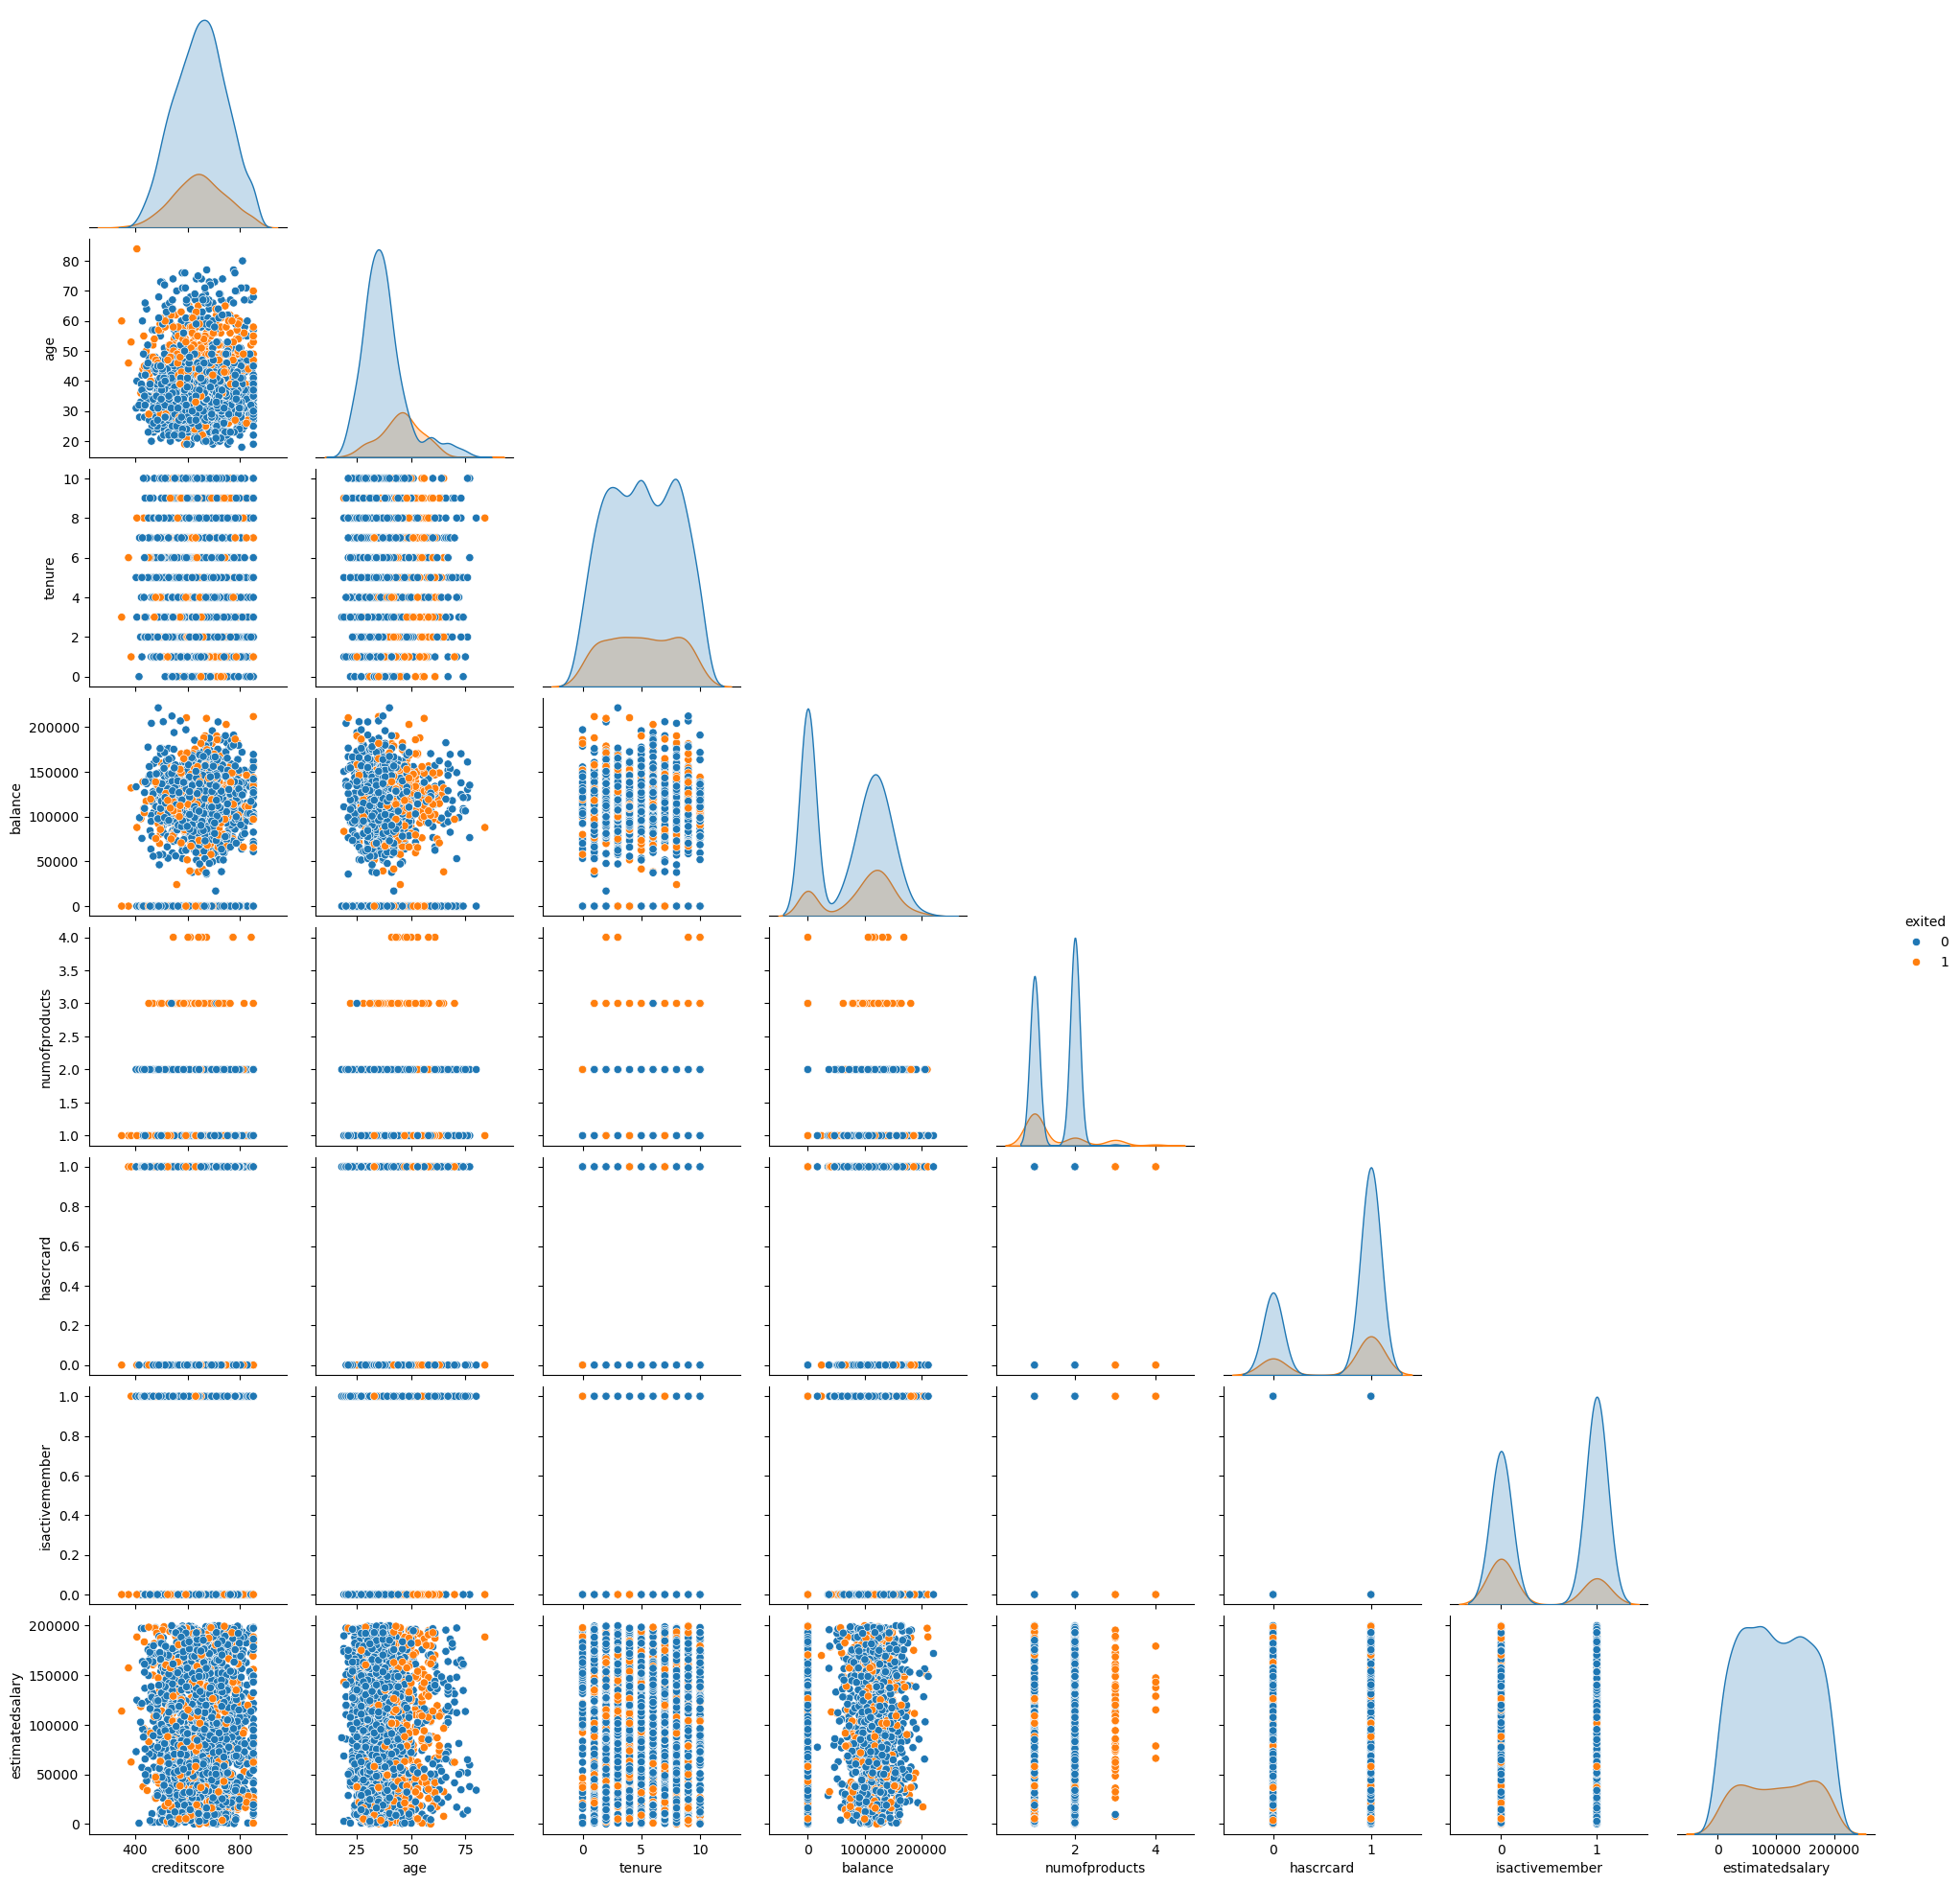

In [71]:
sns.pairplot(train,hue='exited',corner=True)

# 7.Correlation Analysis

<Axes: >

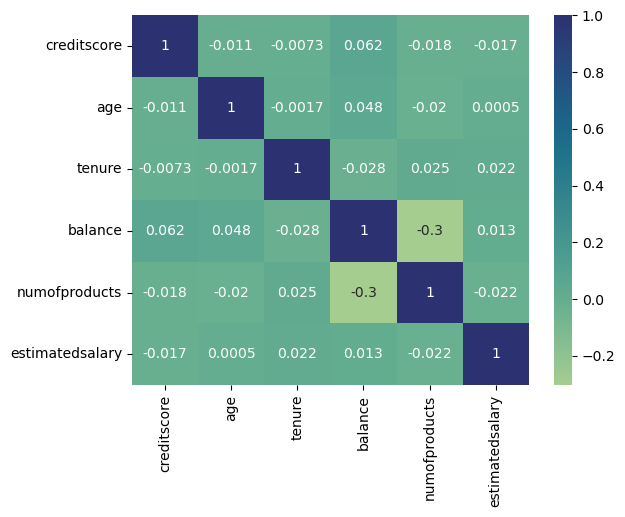

In [77]:
sns.heatmap(
    train
    .select_dtypes(include='number')
    .corr()
    ,cmap='crest'
    ,annot=True
)

In [80]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   surname          1920 non-null   object 
 1   creditscore      1920 non-null   int64  
 2   geography        1920 non-null   object 
 3   gender           1920 non-null   object 
 4   age              1920 non-null   int64  
 5   tenure           1920 non-null   int64  
 6   balance          1920 non-null   float64
 7   numofproducts    1920 non-null   int64  
 8   hascrcard        1920 non-null   object 
 9   isactivemember   1920 non-null   object 
 10  estimatedsalary  1920 non-null   float64
 11  exited           1920 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 180.1+ KB


# 8.Detailed Analysis

## 8.1 Univariate Analysis

### 8.1.1 Surname

In [84]:
train.surname

0            Howard
1       Chukwunonso
2              Chia
3              Kent
4             Mazzi
           ...     
1915          T'ang
1916        Maclean
1917            Sun
1918         Tucker
1919    Eberegbulam
Name: surname, Length: 1920, dtype: object

In [85]:
train['surname'].unique()

array(['Howard', 'Chukwunonso', 'Chia', ..., 'Wilsmore', 'Cole',
       'Eberegbulam'], dtype=object)

<Axes: xlabel='surname', ylabel='count'>

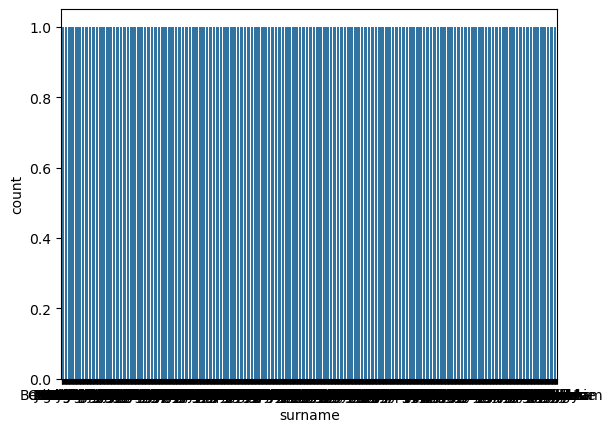

In [86]:
sns.countplot(train['surname'].value_counts())

([<matplotlib.patches.Wedge at 0x15b761cd8b0>,
  ...],
 [Text(1.099905760321578, 0.014398555879379162, ''),
  Text(1.0991519397763472, 0.04318579958613242, ''),
  Text(1.0976448153168867, 0.07194344589994107, ''),
  Text(1.095548644601437, 0.0988593309301359, ''),
  Text(1.0929967952066213, 0.12392742096911043, ''),
  Text(1.0898714196146289, 0.14893048280051288, ''),
  Text(1.086174157798043, 0.17385539661371535, ''),
  Text(1.0822306056075455, 0.19691855241780926, ''),
  Text(1.0781557569959297, 0.21812877769000147, ''),
  Text(1.0736652588039717, 0.239254910163617, ''),
  Text(1.0687608422042572, 0.26028880531219023, ''),
  Text(1.0634443979428008, 0.2812223541685012, ''),
  Text(1.0577179756101303, 0.3020474864507371, ''),
  Text(1.0515837828511274, 0.3227561736737391, ''),
  Text(1.0450441845139415, 0.34334043224413713, ''),
  Text(1.0381017017382936, 0.36379232653817645, ''),
  Text(1.0307590109835292, 0.3841039719610522, ''),
  Text(1.0236790544097745, 0.40259308682925776, ''),


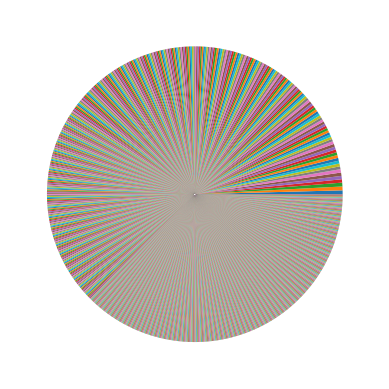

In [87]:
plt.pie(x=train['surname'].value_counts())

- its of no meaning to keep Surname in dataset as of we can see in Univariate Analysis

### 8.1.2 creditscore
    - The distrubution almost looks like Normal Distribution

In [90]:
train.creditscore

0       727
1       773
2       759
3       626
4       686
       ... 
1915    632
1916    631
1917    651
1918    644
1919    781
Name: creditscore, Length: 1920, dtype: int64

<Axes: xlabel='creditscore', ylabel='Count'>

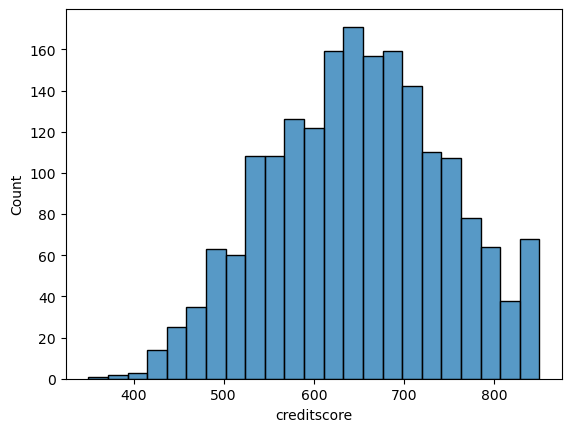

In [91]:
sns.histplot(x=train['creditscore'])

<Axes: xlabel='creditscore', ylabel='Density'>

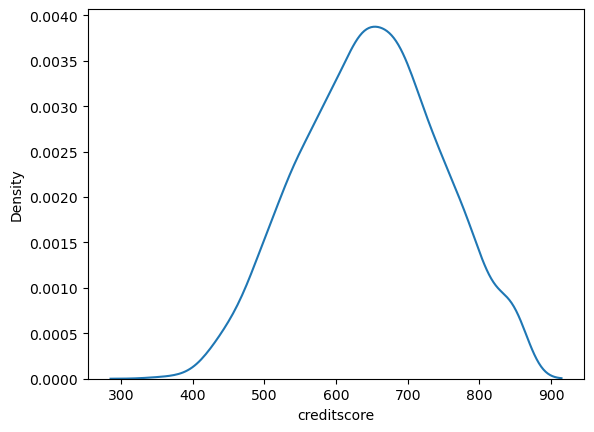

In [92]:
sns.kdeplot(train['creditscore'])

<Axes: xlabel='creditscore'>

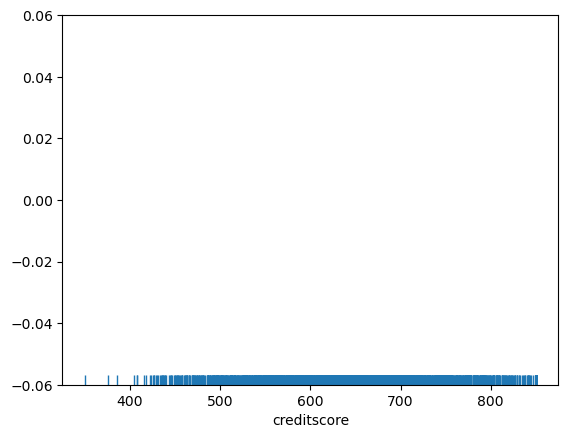

In [93]:
sns.rugplot(train['creditscore'])

<Axes: ylabel='creditscore'>

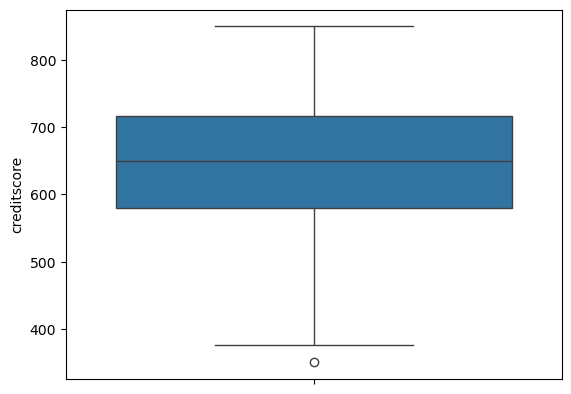

In [94]:
sns.boxplot(train['creditscore'])

<Axes: ylabel='creditscore'>

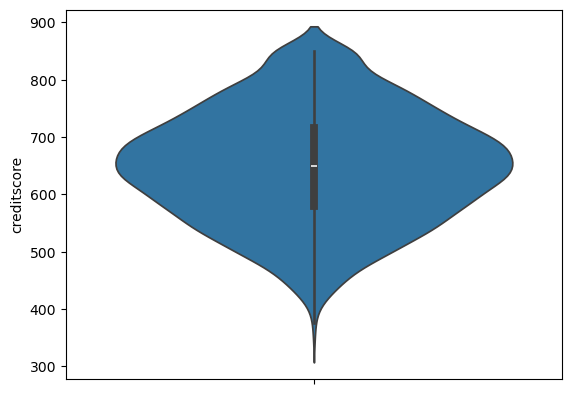

In [95]:
sns.violinplot(train['creditscore'])

((array([-3.3811246 , -3.12929364, -2.98956612, ...,  2.98956612,
          3.12929364,  3.3811246 ]),
  array([350, 376, 386, ..., 850, 850, 850], dtype=int64)),
 (97.09480810605332, 648.5234375, 0.9968493668567902))

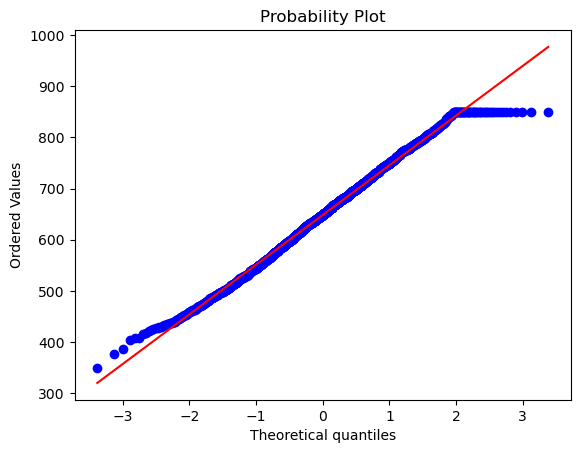

In [96]:
stats.probplot(train['creditscore'],dist='norm',plot=plt)

### 8.1.2 geography

In [98]:
train.geography

0       Germany
1         Spain
2         Spain
3       Germany
4        France
         ...   
1915     France
1916     France
1917    Germany
1918    Germany
1919     France
Name: geography, Length: 1920, dtype: object

In [99]:
train['geography'].value_counts()

geography
France     965
Germany    514
Spain      441
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x15b7834df40>,
 [Text(-0.00899932222165485, 1.0999631867474253, 'France'),
  Text(-0.7198519442786419, -0.8317530753284049, 'Germany'),
  Text(0.8258360192222668, -0.7266325545660062, 'Spain')],
 [Text(-0.004908721211811736, 0.5999799200440501, '50.26'),
  Text(-0.39264651506107734, -0.4536834956336754, '26.77'),
  Text(0.4504560104848727, -0.39634502976327607, '22.97')])

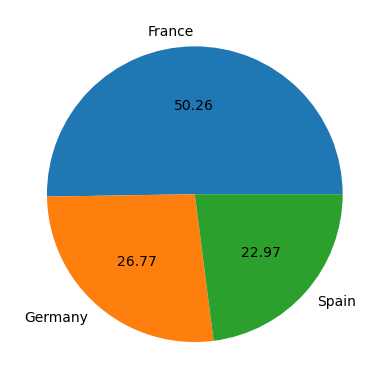

In [100]:
plt.pie(train['geography'].value_counts(),autopct='%.2f',labels=train['geography'].value_counts().index)

<Axes: xlabel='count', ylabel='geography'>

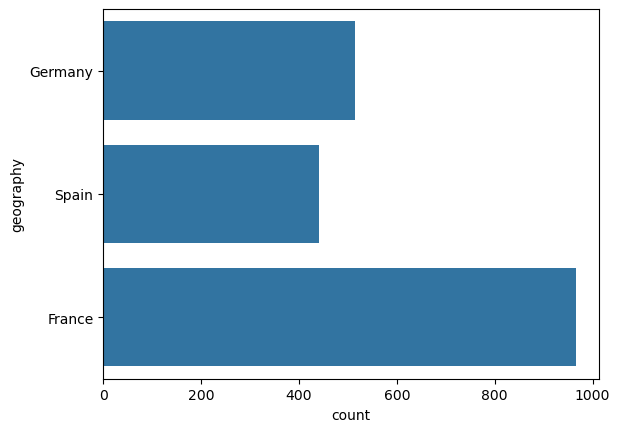

In [101]:
sns.countplot(train['geography'])

### 8.1.3 gender

In [103]:
train['gender']

0         Male
1       Female
2         Male
3         Male
4       Female
         ...  
1915    Female
1916      Male
1917      Male
1918    Female
1919    Female
Name: gender, Length: 1920, dtype: object

([<matplotlib.patches.Wedge at 0x15b78d958b0>,
 [Text(-0.24627677234432158, 1.072076373866929, 'Male'),
  Text(0.24627667196928574, -1.07207639692502, 'Female')],
 [Text(-0.1343327849150845, 0.5847689312001431, '57.19'),
  Text(0.13433273016506492, -0.5847689437772836, '42.81')])

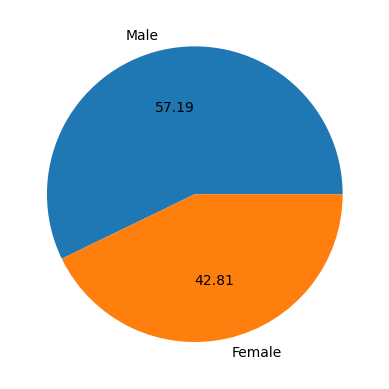

In [104]:
plt.pie(train['gender'].value_counts(),autopct='%.2f',labels=train['gender'].value_counts().index)

### 8.1.4 age

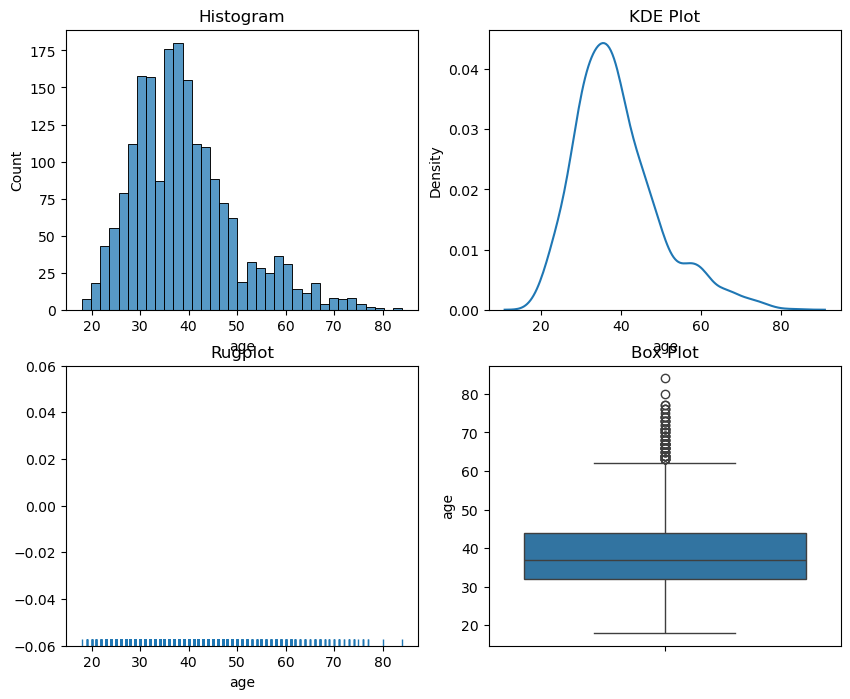

In [106]:
numerical_univariate(train,'age')

### 8.1.5 tenure

In [108]:
train.tenure

0       2
1       4
2       8
3       4
4       3
       ..
1915    3
1916    7
1917    1
1918    8
1919    3
Name: tenure, Length: 1920, dtype: int64

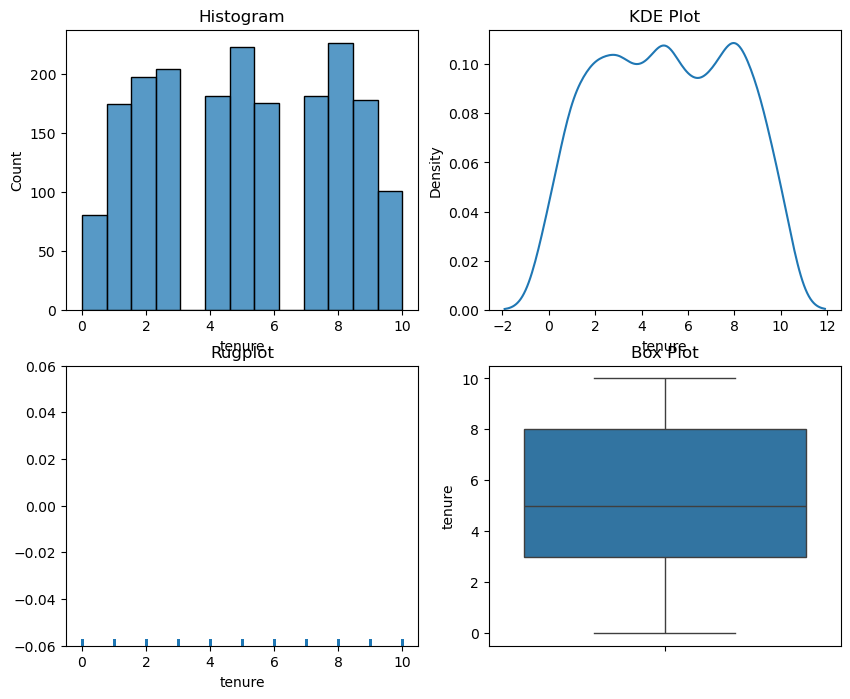

In [109]:
numerical_univariate(train,'tenure')

### 8.1.6 balance

In [111]:
train.balance

0       146407.11
1            0.00
2            0.00
3        88109.81
4       123971.51
          ...    
1915    107375.82
1916         0.00
1917     90218.11
1918    106022.73
1919    156555.54
Name: balance, Length: 1920, dtype: float64

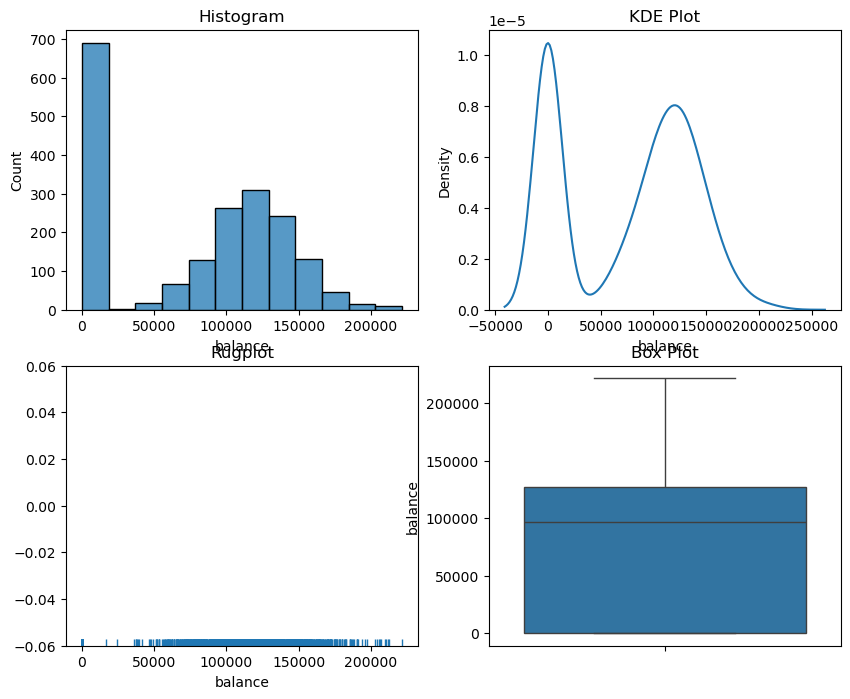

In [112]:
numerical_univariate(train,'balance')

### 8.1.7 numofproducts

In [114]:
train.numofproducts

0       1
1       2
2       2
3       1
4       2
       ..
1915    1
1916    1
1917    1
1918    2
1919    1
Name: numofproducts, Length: 1920, dtype: int64

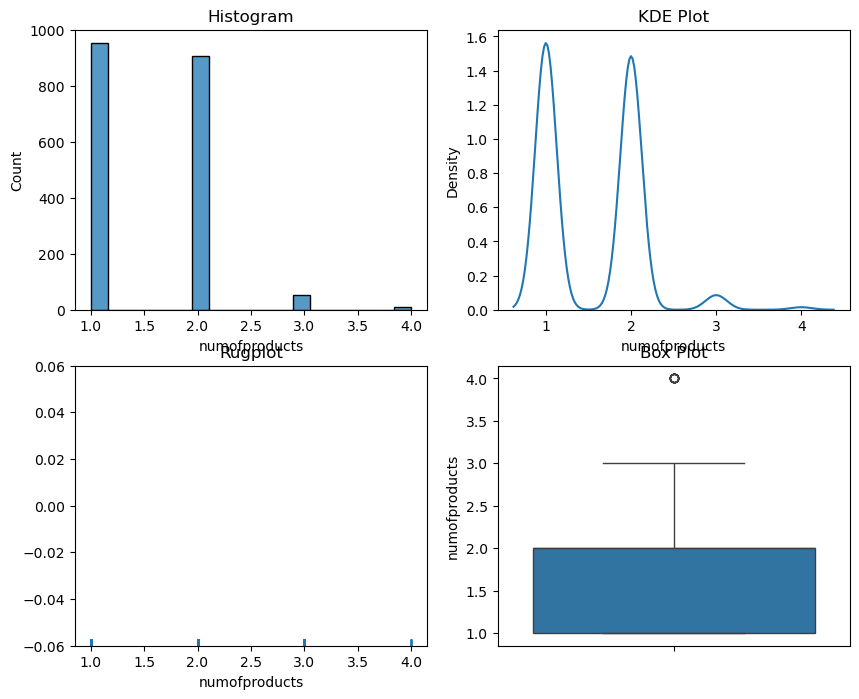

In [115]:
numerical_univariate(train,'numofproducts')

### 8.1.8 hascrcard

In [117]:
train['hascrcard']

0       1
1       0
2       1
3       1
4       1
       ..
1915    1
1916    1
1917    1
1918    0
1919    1
Name: hascrcard, Length: 1920, dtype: object

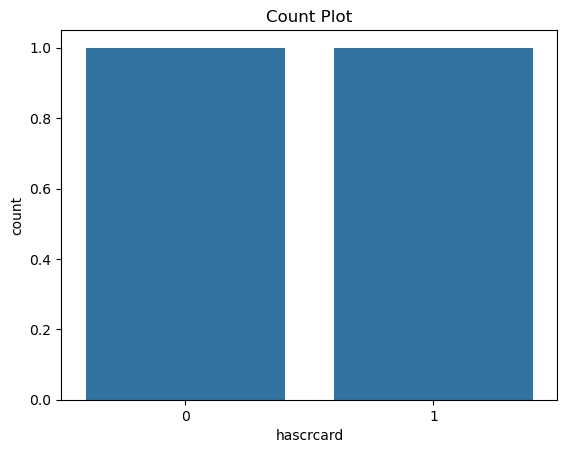

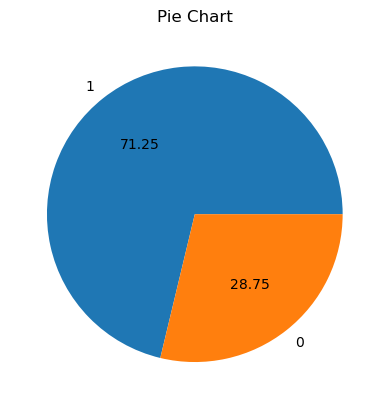

In [118]:
categorical_univariate(train,'hascrcard')

### 8.1.9 isactivemember

In [120]:
train['isactivemember']

0       1
1       1
2       1
3       1
4       0
       ..
1915    1
1916    1
1917    0
1918    0
1919    1
Name: isactivemember, Length: 1920, dtype: object

In [121]:
train['isactivemember'].value_counts()

isactivemember
1    1022
0     898
Name: count, dtype: int64

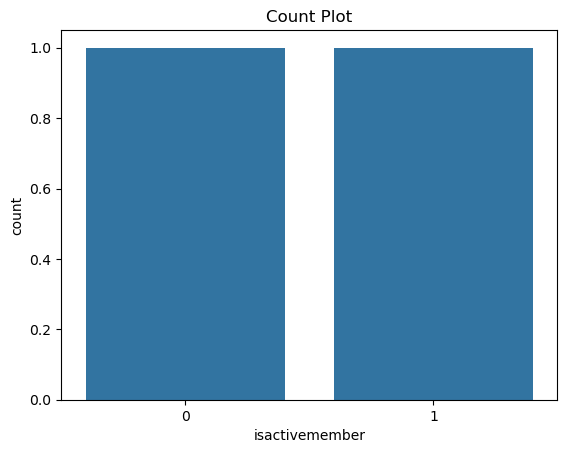

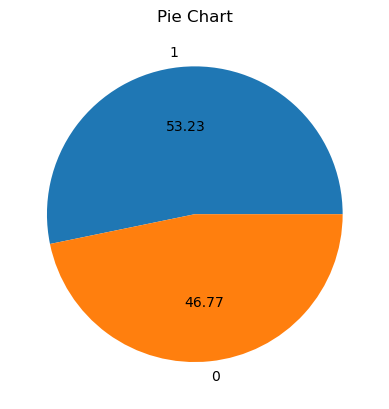

In [122]:
categorical_univariate(train,'isactivemember')

### 8.1.10 estimatedsalary

In [124]:
train['estimatedsalary']

0        72073.72
1       182081.45
2        99086.74
3        32825.50
4       147794.63
          ...    
1915     62703.38
1916     58043.02
1917    174337.68
1918    148727.42
1919    175674.01
Name: estimatedsalary, Length: 1920, dtype: float64

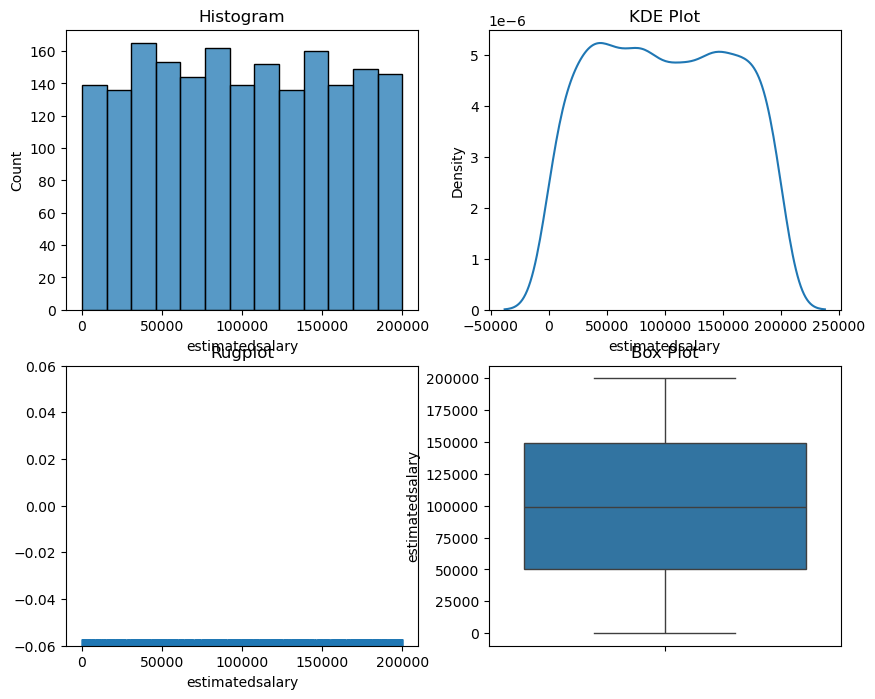

In [125]:
numerical_univariate(train,'estimatedsalary')

### 8.1.11 exited

In [127]:
train['exited']

0       0
1       0
2       0
3       0
4       0
       ..
1915    0
1916    1
1917    0
1918    0
1919    0
Name: exited, Length: 1920, dtype: object

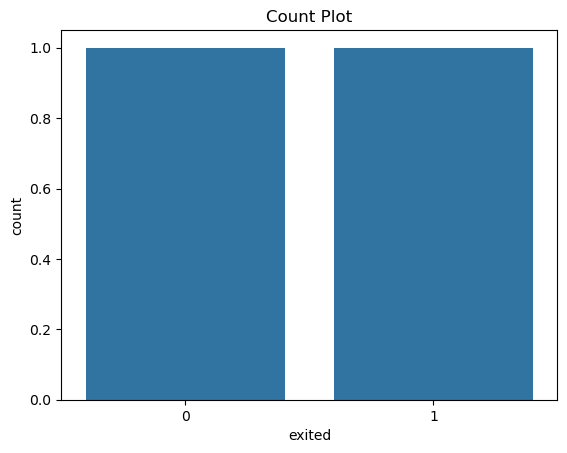

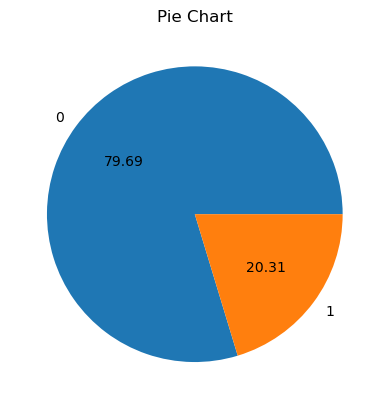

In [128]:
categorical_univariate(train,'exited')

## 8.2 Bivariate Analysis with respect to Target Column

### Box Plot

In [132]:
categorical_columns = (
    train
    .select_dtypes(include='O')
    .columns
)

In [134]:
numerical_columns = (
    train
    .select_dtypes(include='number')
    .columns
)
numerical_columns

Index(['creditscore', 'age', 'tenure', 'balance', 'numofproducts',
       'estimatedsalary'],
      dtype='object')

In [135]:
target = 'exited'

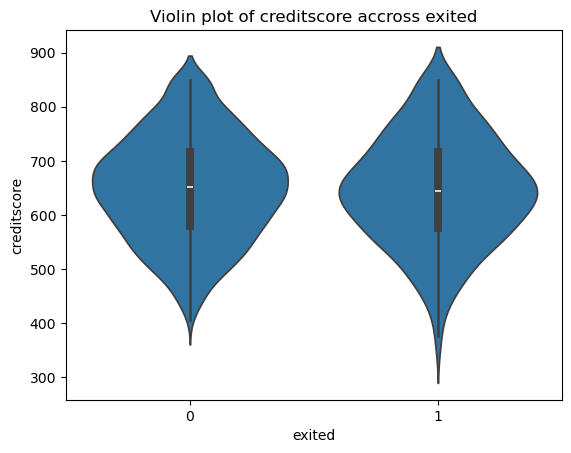

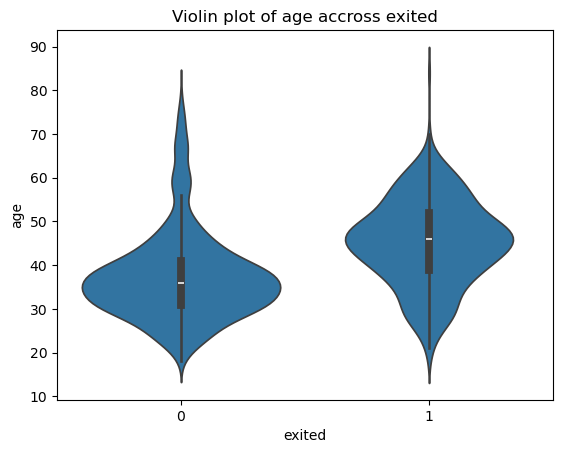

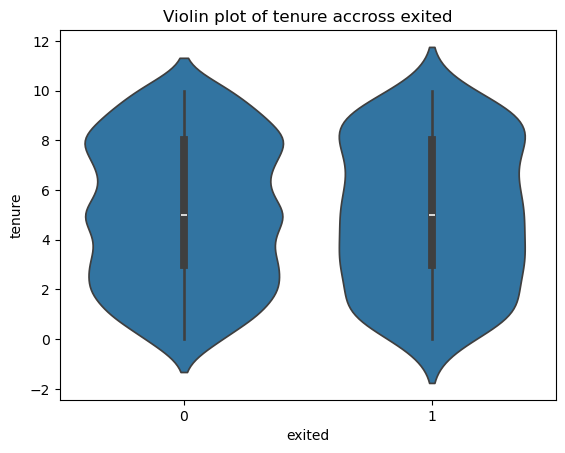

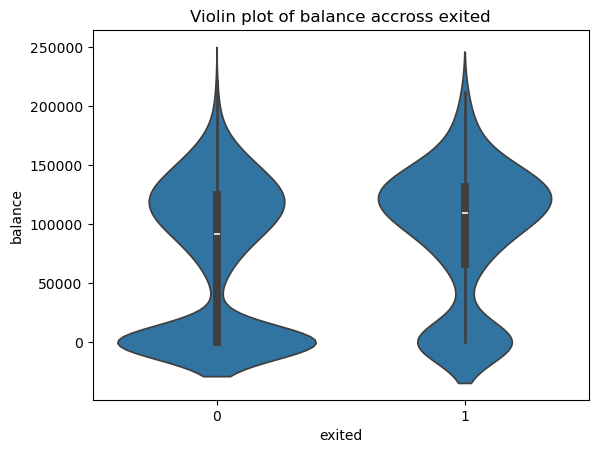

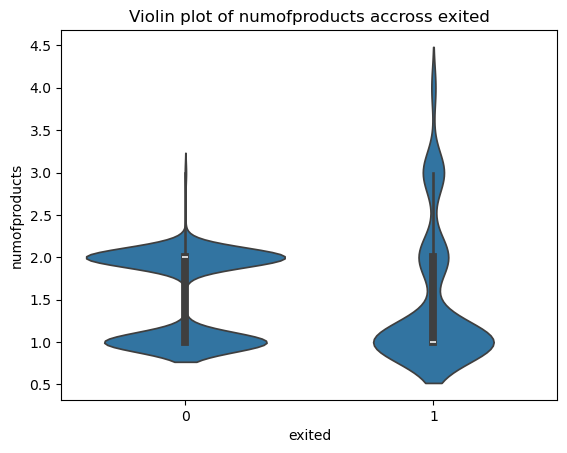

In [136]:
for i in numerical_columns[:-1]:
    plt.figure()
    sns.violinplot(x=target,y=i,data=train)
    plt.title(f'Violin plot of {i} accross {target}')
    plt.show()

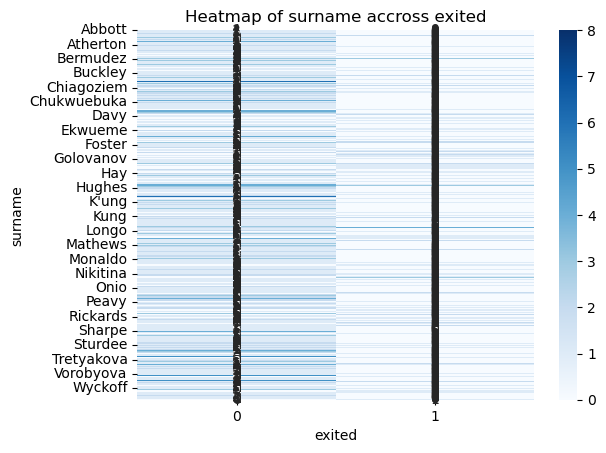

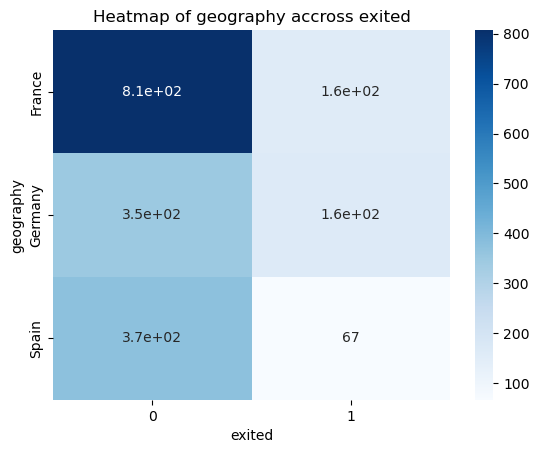

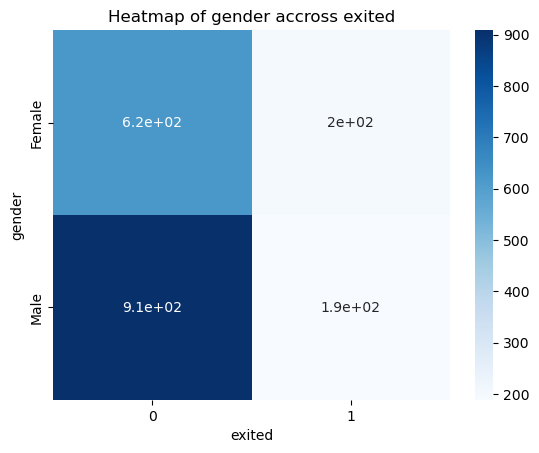

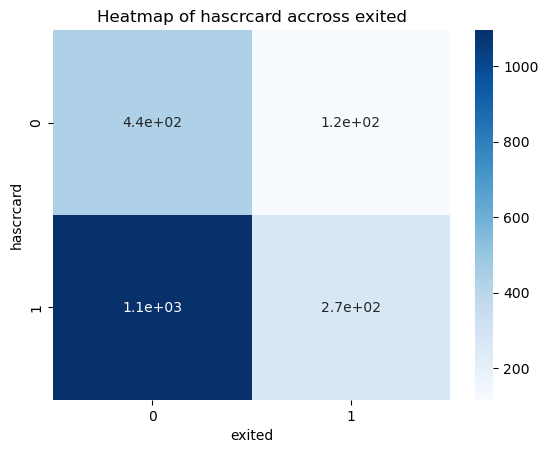

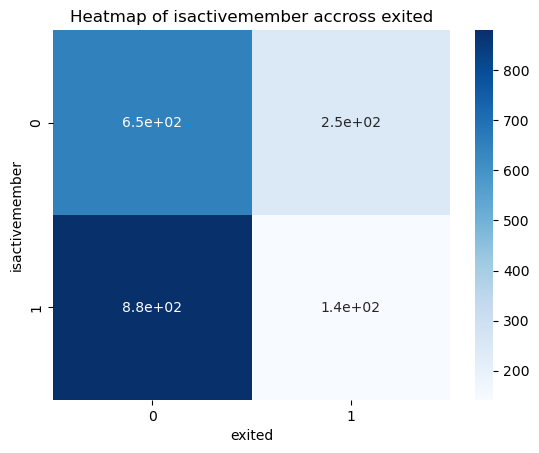

In [137]:
for i in categorical_columns[:-1]:
    contingency_table = pd.crosstab(train[i],train[target])
    plt.figure()
    sns.heatmap(contingency_table,annot=True,cmap='Blues')
    plt.title(f'Heatmap of {i} accross {target}')
    plt.show()

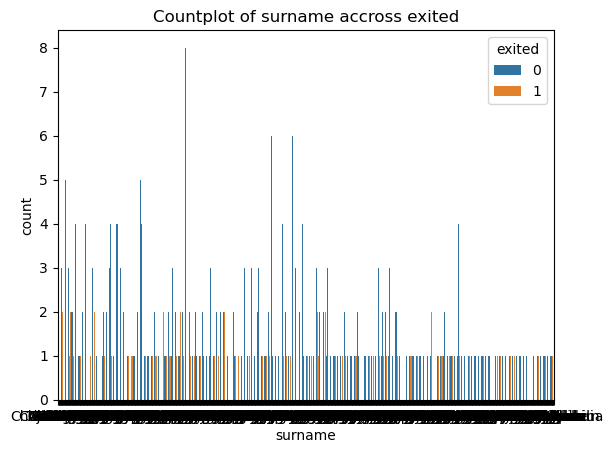

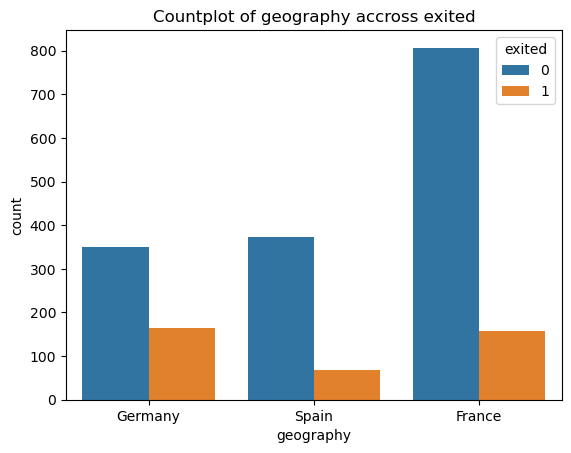

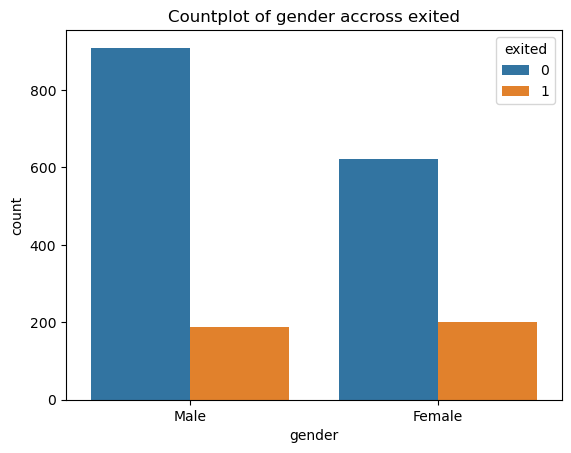

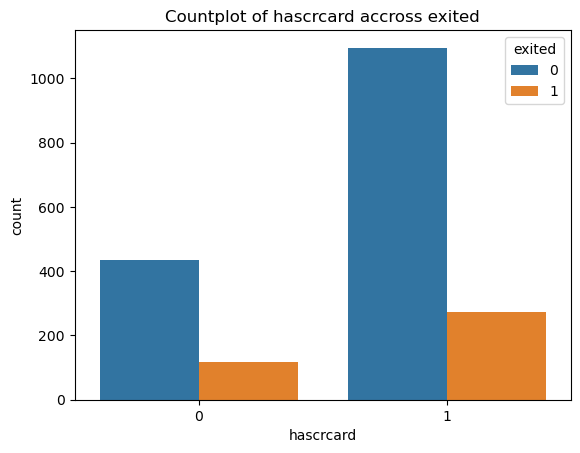

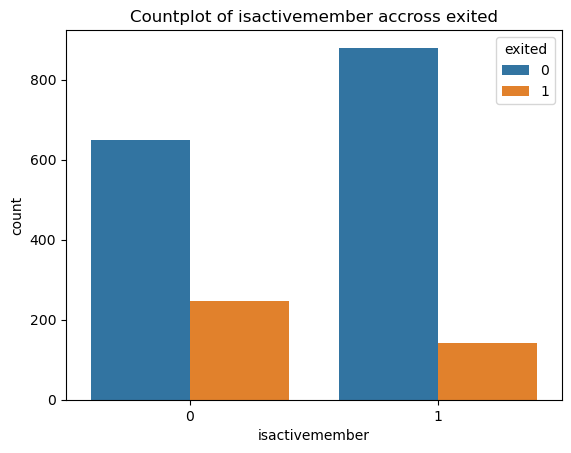

In [138]:
for i in categorical_columns[:-1]:
    plt.figure()
    sns.countplot(x=i,hue=target,data=train)
    plt.title(f'Countplot of {i} accross {target}')
    plt.show()

# 9. Autmated EDA

In [142]:
from ydata_profiling import ProfileReport

In [143]:
report = ProfileReport(train)
report.to_file(output_file='Auto_EDA.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\Abhishek\anaconda3\Lib\site-packages\ydata_profiling\model\pandas\summary_pandas.py:39: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  series = series.fillna(np.nan)
C:\Users\Abhishek\anaconda3\Lib\site-packages\ydata_profiling\model\pandas\summary_pandas.py:39: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  series = series.fillna(np.nan)
C:\Users\Abhishek\anaconda3\Lib\site-packages\ydata_profiling\model\pandas\summary_pandas.py:39: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]